In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(58645, 13)

In [ ]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
df['loan_percent_income'].describe()

,loan_percent_income
count,58645.000000
mean,0.159238
std,0.091692
min,0.000000
25%,0.090000
50%,0.140000
75%,0.210000
max,0.830000


In [ ]:
# Define age bins and labels
age_bins = [0, 25, 45, float('inf')]  # `float('inf')` handles any age greater than 45
age_labels = ['Young', 'Middle-aged', 'Senior']

# Create a new column for age category
df['age_category'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels)

# Display the first few rows to verify
df[['person_age', 'age_category']].head()


,person_age,age_category
0,37,Middle-aged
1,22,Young
2,29,Middle-aged
3,30,Middle-aged
4,22,Young


In [ ]:
# Create the new 'intent_grade' feature by combining 'loan_intent' and 'loan_grade'
df['intent_grade'] = df['loan_intent'] + "_" + df['loan_grade']

# Check the first few rows to verify
df[['loan_intent', 'loan_grade', 'intent_grade']].head()


,loan_intent,loan_grade,intent_grade
0,EDUCATION,B,EDUCATION_B
1,MEDICAL,C,MEDICAL_C
2,PERSONAL,A,PERSONAL_A
3,VENTURE,B,VENTURE_B
4,MEDICAL,A,MEDICAL_A


In [ ]:
# Create the employment duration ratio feature
df['emp_length_ratio'] = df['person_emp_length'] / df['person_age']


In [ ]:
# Create a new feature for the loan amount to income ratio
df['loan_income_ratio'] = df['loan_amnt'] / df['person_income']

# Display the first few rows to verify the new feature
df[['loan_amnt', 'person_income', 'loan_income_ratio']].head()


,loan_amnt,person_income,loan_income_ratio
0,6000,35000,0.171429
1,4000,56000,0.071429
2,6000,28800,0.208333
3,12000,70000,0.171429
4,6000,60000,0.100000


In [ ]:
# Calculate the percentage of rows with loan interest rate <= 10
percentage = (df[df['loan_int_rate'] <= 7].shape[0] / df.shape[0]) * 100
print(f"Percentage of rows with loan interest rate <= 10: {percentage:.2f}%")

Percentage of rows with loan interest rate <= 10: 12.70%


- 2,3,4   ------->**10000**
- 5,6,7,8,9, ------->**3000**
- 11,12,13,14,15,16,17 ------->**1000**
- 20,24,19,27,28,22,21,23,26,25,30,29,18 ------->**100**



Dividing credit history into categories

In [ ]:
df['credit_history_new'] = df['cb_person_cred_hist_length']

In [ ]:
def myfunc(num):
    if num > 0 and num <=4:
        #less years
        return 0
    elif num > 4 and num <=10:
        # more years
        return 1
    elif num > 10 and num <=15:
        # high years
        return 2
    elif num > 15 and num <=20:
        return 3
    else:
        # a very long history
        return 4

In [ ]:
df['credit_history_new'] = df['cb_person_cred_hist_length'].apply(myfunc)

In [ ]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,intent_grade,emp_length_ratio,loan_income_ratio,credit_history_new
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,EDUCATION_B,0.000000,0.171429,2
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,MEDICAL_C,0.272727,0.071429,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,PERSONAL_A,0.275862,0.208333,1
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,VENTURE_B,0.466667,0.171429,1
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,MEDICAL_A,0.090909,0.100000,0


In [ ]:
df.shape

(58645, 18)

**Performing EDA**

---


- classification problem
- no null values



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

# **CATEGORIZING COLUMNS**

---
**Numerical**
- person_age
- person_income
- person_emp_length
- loan_amnt
- loan_int_rate
- loan_percent_income
- cb_person_cred_hist_length
---
**Categorical**
- person_home_ownership
- loan_intent
- loan_grade
- cb_person_default_on_file
- loan_status **-->target column**



In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,50295
1,8350


**Univariate Analysis**
---
**person_age**
- Potential outliers found
- heavily right skewed (1.96)

**person_income**
- check for outliers
- right skewed

**person_emp_length**
- outliers detected
- right skewed (2.05)

**loan_amnt**
- multi modal distribution
- check for outliers

**loan_int_rate**
- multimodal distribution

**loan_percent_income**
- min value 0 ----> check
- some people have high risk

**cb_person_cred_hist_length**
- very weird kind of distribution kind of clusturs and right skewed
- check for outliers


In [ ]:
df['cb_person_cred_hist_length'].describe()

,cb_person_cred_hist_length
count,58645.000000
mean,5.813556
std,4.029196
min,2.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,30.000000


<Axes: xlabel='cb_person_cred_hist_length', ylabel='Density'>

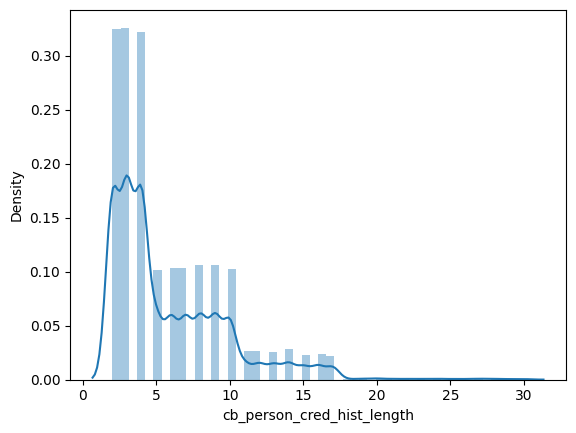

In [ ]:
sns.distplot(df['cb_person_cred_hist_length'])

<Axes: ylabel='cb_person_cred_hist_length'>

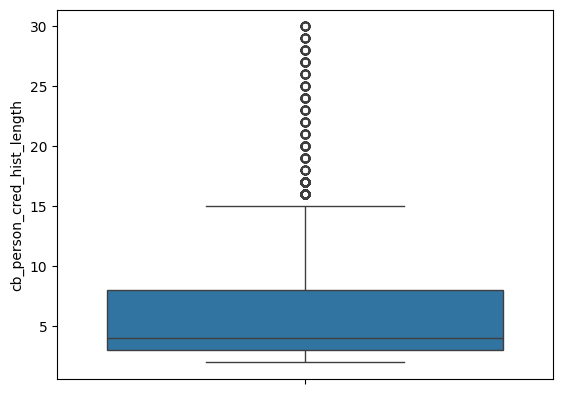

In [ ]:
sns.boxplot(df['cb_person_cred_hist_length'])

In [ ]:
df['cb_person_cred_hist_length'].skew()

1.6185028956126892

<Axes: ylabel='count'>

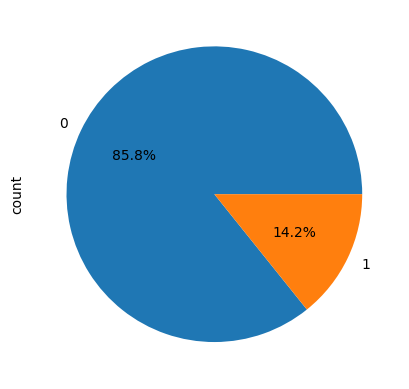

In [ ]:
df['loan_status'].value_counts().plot(kind='pie' , autopct='%0.1f%%')

<Axes: xlabel='loan_status'>

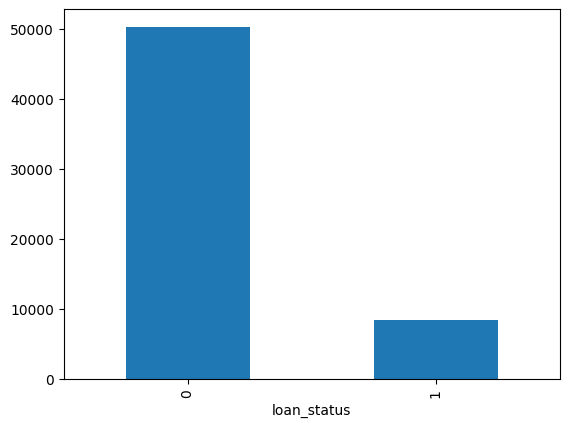

In [ ]:
df['loan_status'].value_counts().plot(kind='bar' )

# **Bivariate Analysis**

---
- (*cb_person_cred_hist_length*)  and (*person_age*) are highly ve+ related  
- (*loan_amount)* and (*loan_percent_income*) are highly reated ve+ related
- (*person_income*) and (*loan_percent_income*) are mildly -ve related


---
- if loan amount greater then more defaults (1)
- if greater inncome less defualts(1)
- if loan % income greater then more deaults(1)


In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                                  id  person_age  person_income  \
id                          1.000000    0.008608      -0.001896   
person_age                  0.008608    1.000000       0.102176   
person_income              -0.001896    0.102176       1.000000   
person_emp_length           0.005376    0.121276       0.164042   
loan_amnt                  -0.000403    0.050378       0.310942   
loan_int_rate              -0.003454    0.009653      -0.057611   
loan_percent_income        -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length  0.008139    0.874260       0.082727   
loan_status                -0.008138   -0.001130      -0.169956   

                            person_emp_length  loan_amnt  loan_int_rate  \
id                                   0.005376  -0.000403      -0.003454   
person_age                           0.121276   0.050378       0.009653   
person_income                        0.164042   0.310942      -0.057611   
person_emp_length            

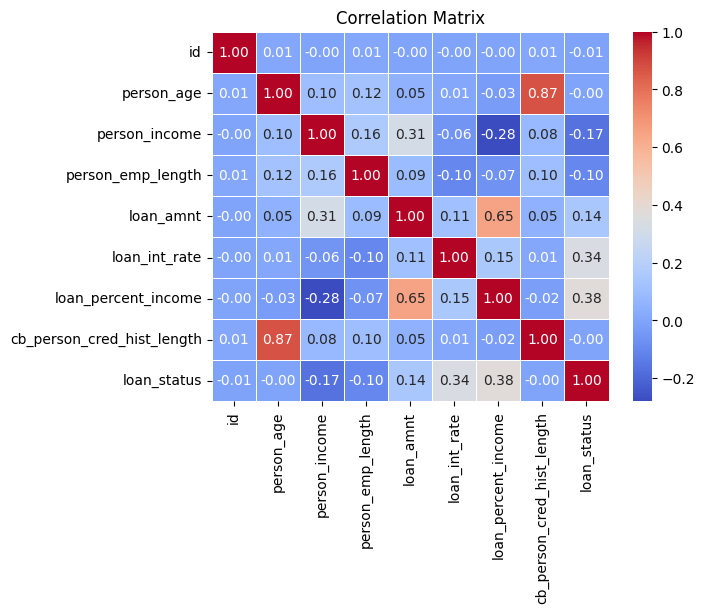

In [ ]:
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


<Axes: xlabel='loan_status', ylabel='person_home_ownership'>

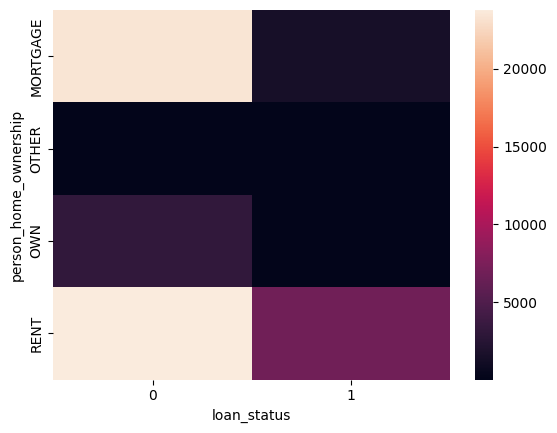

In [ ]:
sns.heatmap(pd.crosstab(df['person_home_ownership'], df['loan_status'] ))

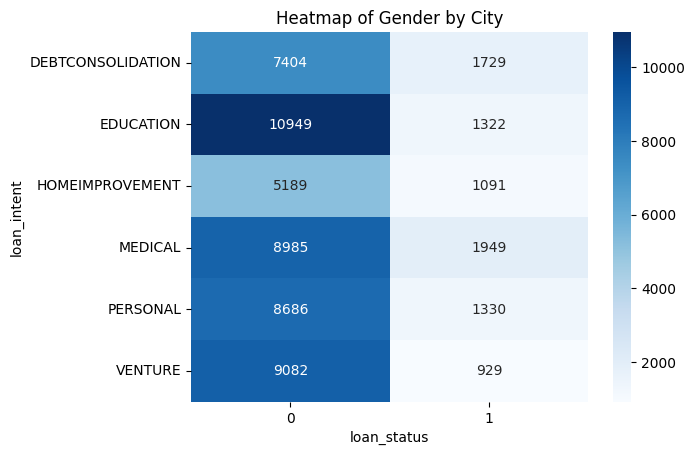

In [ ]:
contingency_table = pd.crosstab(df['loan_intent'], df['loan_status'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Gender by City')
plt.show()

<Axes: xlabel='person_home_ownership', ylabel='count'>

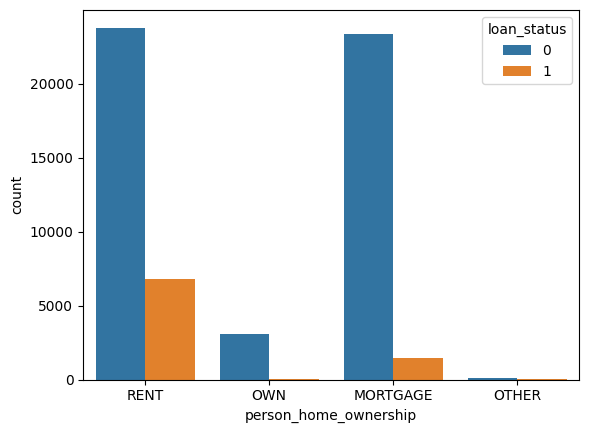

In [ ]:
sns.countplot(data=df, x='person_home_ownership', hue='loan_status')

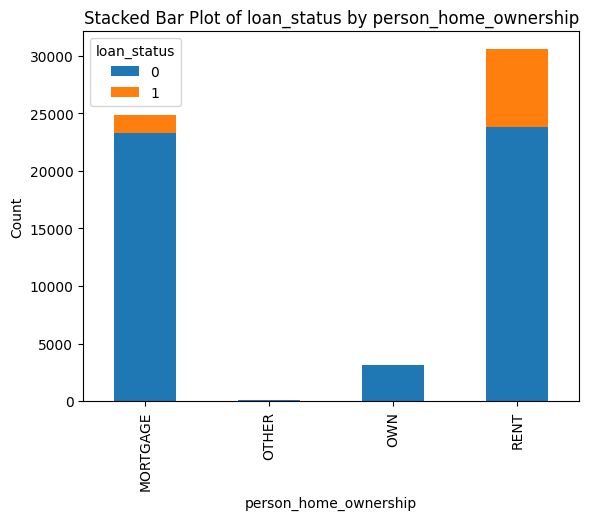

In [ ]:
df.groupby(['person_home_ownership', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of loan_status by person_home_ownership')
plt.ylabel('Count')
plt.show()

# **DEALING WITH OUTLIERS**

In [ ]:
#for age column
df = df.drop(47336)

# for emp length col
df = df.drop(41079)
df = df.drop(49252)


In [ ]:
#only having cols where diff btw age and emp years is =>16
df =  df[((df['person_age'] - df['person_emp_length']) >= 16)]

In [ ]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


# **ENCODING**

In [ ]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_category,intent_grade,emp_length_ratio,loan_income_ratio,credit_history_new
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,Middle-aged,EDUCATION_B,0.000000,0.171429,2
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,Young,MEDICAL_C,0.272727,0.071429,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,Middle-aged,PERSONAL_A,0.275862,0.208333,1
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,Middle-aged,VENTURE_B,0.466667,0.171429,1
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,Young,MEDICAL_A,0.090909,0.100000,0


In [ ]:
df['age_category'].value_counts()

,count
age_category,
Middle-aged,29286
Young,27369
Senior,1007


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['loan_status']),df['loan_status'],
                                                test_size=0.2)

In [ ]:
transformers = ColumnTransformer(transformers = [

    ('t1' ,OneHotEncoder(sparse_output=False , drop='first'),['person_home_ownership','loan_intent','cb_person_default_on_file']), # Added comma here
    ('t2' ,OrdinalEncoder(categories=[['G','F','E','D','C','B','A']]),['loan_grade']), # This line was missing a comma at the end before, but not necessarily causing the error
    ('t3' ,OrdinalEncoder(categories=[['Young','Middle-aged','Senior']]),['age_category'])
    ],remainder='passthrough')


In [ ]:
# Calculate mean target for each 'intent_grade' category
intent_grade_means = df.groupby('intent_grade')['loan_status'].mean()
df['intent_grade_encoded'] = df['intent_grade'].map(intent_grade_means)


In [ ]:
X_train_transformed = transformers.fit_transform(X_train)

In [ ]:
X_test_transformed = transformers.transform(X_test)

In [ ]:
col_names = transformers.get_feature_names_out()
modified_columns = [col.split('__')[-1] for col in col_names]

X_train = pd.DataFrame(X_train_transformed, columns = modified_columns)
X_test = pd.DataFrame(X_test_transformed, columns = modified_columns)


In [ ]:
X_train.drop(columns=['intent_grade'], inplace=True)

In [ ]:
X_test.drop(columns=['intent_grade'], inplace=True)

In [ ]:
X_train['age_category']

,age_category
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
46124,1.0
46125,1.0
46126,1.0
46127,0.0


In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('power_transform', PowerTransformer(method='yeo-johnson')),  # Apply power transformation
    ('scaler', StandardScaler())  # Then scale
])

# Fit and transform on the training data
X_train_transformed = pipeline.fit_transform(X_train)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.8846787479406919
Accuracy DT 0.9106043527269574


In [ ]:
# In cell 135:

print("LR",np.mean(cross_val_score(clf,X_train_transformed,y_train,scoring='accuracy',cv=10))) # Changed X_transformed2 to X_train_transformed. Assumed this is the intended variable. Changed y to y_train
print("DT",np.mean(cross_val_score(clf2,X_train_transformed,y_train,scoring='accuracy',cv=10))) # Changed X_transformed2 to X_train_transformed. Assumed this is the intended variable. Changed y to y_train

LR 0.8913047077069611
DT 0.9118992311971768


before
- Accuracy LR 0.8851122864822683
- Accuracy DT 0.9160669383508194


---
- LR 0.8920419290932579
- DT 0.912593129751904
